<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
try:
    url = 'https://drive.google.com/file/d/1n3yXII3Svbb4nzrxLHJaRrDQRcGyPuY1/view?usp=sharing'
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    data = pd.read_csv(path, sep='\t')
except:
    raise
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data['total_images'].value_counts().sort_index()

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

In [3]:
len(data[data['total_images'].isna()])

0

Поле с количеством фотографий имеет целочисленный тип (нет необходимости корректировть).
Значения в поле варьируются от 0 до 50. Возможно имеет смысл объединить в одну категорию количество фото >20

In [4]:
data['last_price'].isnull().sum()

0

In [5]:
len(data[data['last_price'].isna()])

0

Поле last_price не содержит нулевых значений. 

In [6]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Описание данных показывает отсутствие явных аномалий. Стандартное отклонение 1,08 говорит о том, что значения в выборке
отличаются от среднего арифметического всего на 8%, это хороший показатель, данные однородны. Среднее и медииана отличаются на 1,9 единицы. Минимальное значение - 1,2 (условно) млн., максимальное - 7,6 млн. Тип данных - float64, изменение типа данных
не требуется.

In [7]:
data['total_area'].isnull().sum()

0

In [8]:
len(data[data['total_area'].isna()])

0

Поле total_area не содержит пропусков и не требует изменения типа.

In [9]:
data['first_day_exposition'].isnull().sum()

0

In [10]:
len(data[data['first_day_exposition'].isna()])

0

Поле first_day_exposition не содержит нулевых значений. Тип данных - object. Требуется преобразование к типу даты.

In [11]:
data['rooms'].value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [12]:
len(data[data['rooms'].isna()])

0

Метод value_counts() показывает наличие 197 объектов, число комнат в которых - 0 и несколько объектов, имеющих от 12 до 19 комнат. Необходимо более подробно изучить эти объекты, чтобы принять решение, содержат ли эти записи ошибки данных и необходимо
ли оставлять их в датасете.

In [13]:
data.query('rooms ==0').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


Срез с условием rooms ==0 не выявляет аномалий в записях об объектах с нулевым количеством комнат. Но одна закономерность прослеживается: площадь кухни в таких объектах имеет значение NaN. Проверим эту гипотезу.

In [14]:
data.query('rooms ==0 and ~kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Во всех объектах с нулевой "комнатностью" площадь кухни не указана. Проверим, являются и эти комнаты апартаментами или объектами со свободной планировкой.

In [15]:
data.query('rooms ==0').pivot_table(index = 'is_apartment', values = 'open_plan', aggfunc = 'count')

,open_plan
is_apartment,
False,6


Вывод: это не апартаменты и объектов со свободной планировкой среди 197 этих объектов всего 6. Скорее всего речь идет о продаже отдельных комнат.

In [16]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Описательная статистика для поля с высотой потолков показывает разброс от 1 метра до 100 метров. Посмотрим на распределение более детально.

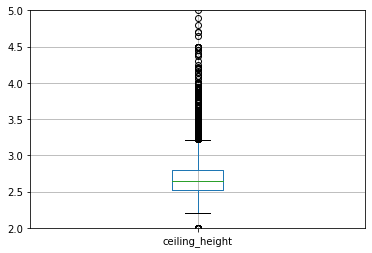

In [17]:
import matplotlib.pyplot as plt
plt.ylim(2, 5)
data.boxplot(column = 'ceiling_height')

Для читабельности ограничим значения оси y (высота потолков) 2 и 5 метрами. Минимальная высота потолков жилого помещения по стандарту - 2,5 метра. На диаграмме видно, что выше 4,5 метров частота повторения значений снижается, выше - уже вбросы. 2 квартиль включает в себя объекты с высотой потолков от 2,5 до 2,75 метров, что достаточно правдоподобно.  Для анализа предлагается взять диапазон высоты потолков от 2,5 до 4,5 метров, а для остальных посчитать медианы в разрезе "общая площадь - количество этажей в доме - название населенного пункта". 

In [18]:
len(data[data['ceiling_height'].isna()])

9195

Исходя из распределения объектов по этажам есть смысл выделить объединить в категорию объекты от 25 этажа и выше.
Также поле содержит 9195 записей с содержимым NaN. Т.к. данный параметр обязателен к использованию в анализе, можно заменить его медианным значением по совокупному параметру ("площадь"+ "этажность", количество проектов домов ограничено и вероятность того, что высоты потолков в доме определенной этажности и квартире определенной площади будут идентичны), но т.к. доля пропущенных значений - почти 40% от общего числа записей, цена возможной ошибки будет очень велика.

In [19]:
data['floors_total'].value_counts().sort_index()

1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

In [20]:
len(data.query('floors_total.isna()',engine = 'python'))

86

In [21]:
(data.query('floors_total.isna()',engine = 'python')
 .pivot_table(index= 'floor', values = 'last_price', aggfunc = 'count')
 .reset_index())

,floor,last_price
0,1,3
1,2,2
2,3,4
3,4,10
4,5,4
5,6,9
6,7,4
7,8,8
8,9,5
9,10,3


В поле floors_total - 86 пропущенных значений. Немного, но это поле необходимо для расчета медианных значений. Анализ показывает отсутствие зависимости этажа объекта от общей этажности здания (можно было бы предположить, что пропуски - это одноэтажные объекты частного сектора, но гипотеза не подтверждается, в топе пропусков - объекты на 4, 6 и 9 этажах). Заменим NaN на наиболее часто встречающиеся этажности домов по условиям: для объектов до 5 этажей - на 5-этажные, от 6 до 9 - 9-этажные, от 10 до 16 - 16-этажные, и остальные - на 25-этажные дома.
Также поле floors_total необходимо привести к целочисленному типу.

In [22]:
data['living_area'].isnull().sum()

1903

In [23]:
data['living_area'].isna().sum()

1903

В поле living_area - 1903 незаполненных значения. Т.к. это поле будет использовано в расчете метрики отношения к общей площади и пропуски составляют 8% от всего датасета (является значимой величиной), можно попробовать восстановить пропущенные значения по медианным значениям совокупности критериев имеющихся данных (количество комнат, общее количество этажей в доме). Или исключить эти данные из расчёта.

In [24]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

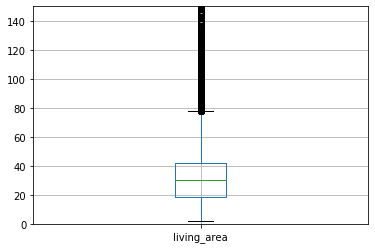

In [25]:
plt.ylim(0, 150)
data.boxplot(column = 'living_area')

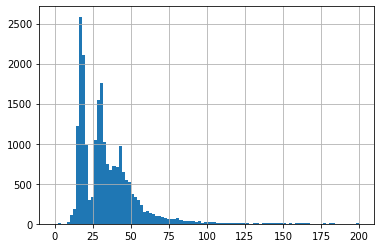

In [26]:
data['living_area'].hist(bins = 100, range=(0, 200))

In [27]:
(data.query('~living_area.isna()', engine='python')
 .sort_values('living_area').tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,NaN,...,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
20273,12,20000000.0,460.8,2019-03-20T00:00:00,6,3.10,3.0,279.6,1,NaN,...,55.5,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
14088,8,51000000.0,402.0,2017-02-07T00:00:00,6,3.15,8.0,300.0,6,NaN,...,56.0,2.0,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Для более точного выявления вбросов и артефактов не хватает столбца с ценой за квадратный метр. Добавим его в датафрейм.

In [28]:
data['price_per_m2'] = data['last_price']/data['total_area']

In [29]:
data['floor'].value_counts().sort_index()

1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

In [30]:
len(data[data['floor'].isna()])

0

Данное поле не требует замены типа данных и предобработки

In [31]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Данное поле не может быть полноценно использовано в исследовании, т.к. заполнено всего на 11% и нет возможности корректно воссоздать признак is_apartment.

In [32]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Признак "студия" имеют всего 149 объектов из датасета. Для второго по количеству населения города страны такое количество студий в выборке кажется неправдоподобно малым. Проверим корректность заполнения этого поля, сопоставив количество комнат в объектах с параметром studuo равным True. 

In [33]:
data[data['studio']==1].pivot_table(index = 'rooms',values = 'studio', aggfunc = 'count')

,studio
rooms,
0,138
1,11


138 объектов с rooms = 0 и 11 с одной комнатой. Похоже на правду, но неясно, почему в одних объявлениях 0, а в других - 1 комната. Изучим срезы обоих случаев и посмотрим на параметры объектов. 

In [34]:
data.query('studio==1 and rooms ==0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,90740.740741
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479.158982
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,74000.000000
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,103734.439834
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,88235.294118
1173,12,3240000.0,29.00,2018-10-30T00:00:00,0,NaN,24.0,17.00,2,NaN,...,2.0,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0,111724.137931
1174,3,3900000.0,32.00,2016-10-18T00:00:00,0,2.70,24.0,18.00,2,NaN,...,2.0,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0,121875.000000
1220,5,3300000.0,27.00,2017-11-10T00:00:00,0,2.80,17.0,20.00,16,NaN,...,NaN,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113.0,122222.222222
1260,0,2600000.0,27.00,2018-07-20T00:00:00,0,2.70,16.0,16.00,4,NaN,...,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,102.0,96296.296296
1277,10,3150000.0,26.00,2017-07-14T00:00:00,0,2.75,21.0,17.38,11,NaN,...,NaN,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622.0,121153.846154


На первый взгляд артефакты не определяются. Выведем описательную статистику среза по полю total_area и price_per_m2.

In [35]:
data.query('studio==1 and rooms ==0').describe()[['total_area','price_per_m2']]

,total_area,price_per_m2
count,138.000000,138.000000
mean,27.814348,109964.879229
std,9.611879,28568.640374
min,15.500000,34375.000000
25%,24.000000,91284.423892
50%,26.000000,106370.229730
75%,28.775000,127077.242653
max,98.400000,231960.000000


Среднее - 27,8 м2 - вполне нормальная площадь для студии, как и медиана 26 м2. Третий квартиль - 28 м2 - также приемлемая для квартиры - студии площадь. 98 м2 похоже на вброс (или премиум - студию). Отфильтруем датафрейм по условиям  и посмотрим на характеристики объектов.

In [36]:
data.query('studio==1 and rooms ==0 and total_area > 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2
3458,6,7400000.0,73.6,2017-05-18T00:00:00,0,NaN,3.0,50.0,1,NaN,...,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0,100543.478261
10008,20,5050000.0,44.2,2017-09-14T00:00:00,0,2.7,9.0,32.2,1,NaN,...,NaN,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0,114253.393665
13613,16,8100000.0,58.4,2019-04-26T00:00:00,0,3.3,7.0,33.0,6,NaN,...,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN,138698.630137
15319,4,5970000.0,43.3,2017-07-20T00:00:00,0,2.8,9.0,28.2,2,NaN,...,2.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,30.0,137875.288684
16130,14,5000000.0,42.1,2018-04-13T00:00:00,0,NaN,20.0,30.0,10,NaN,...,NaN,Санкт-Петербург,50605.0,15933.0,0.0,NaN,0.0,NaN,170.0,118764.845606
20082,10,16300000.0,98.4,2017-11-08T00:00:00,0,3.1,5.0,60.5,2,NaN,...,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0,165650.406504
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,NaN,...,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,115492.957746


Цены за квадратный метр у отфильтрованных объектов варьируются от 100 до 160 тыс. Правдоподобная цена для студий премиум - сегмента, учитывая медиану в 100 тыс/м2. Вывод - данные записи с большей вероятностью не являются вбросами.

Поле kitchen_area заполнено у 21421 объектов. Выше было выявлено, что предположительно у комнат, выставленных на продажу данное поле не заполнено. Сформируем сводную с фильтром по незаполненным полям kitchen_area и изучим прочие параметры этих объектов.

In [37]:
data[data['kitchen_area'].isna()].pivot_table(index= 'rooms', values = 'total_area', aggfunc = 'count')
#data.query('kitchen_area.isna()').head(10)

,total_area
rooms,
0,197
1,834
2,654
3,434
4,99
5,41
6,8
7,7
8,3


In [38]:
len(data[data['kitchen_area'].isna()])

2278

Помимо 197 объектов с атрибутом 'rooms' = 0 поле kitchen_area не заполнено у 834 однокомнатного объекта, 654 двухкомнатных, 434 трехкомнатных и, далее по списку (итого 2278). Данное поле необходимо для метрики "отношение площади кухни к общей площади", поэтому предлагается заполнить его медианой по совокупности признаков (количество комнат+этажность дома).

In [39]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [40]:
len(data[data['balcony'].isna()])

11519

Поле balcony имеет 11 519 значений типа 'NaN'. Обычно в типовых многоэтажных домах от 5 этажей балкона нет на первом этаже. Также некоторые дома не имеют балконов, а оборудованы лоджиями (предположительно, это разные объекты). Проанализируем, у каких объектов отсутвтуют записи в поле balcony.

In [41]:
balcony_set = data.query('balcony.isna() and floor !=1 and floors_total>=5', engine = 'python').pivot_table(index = ['floors_total','floor'], values = 'total_area', aggfunc = 'count')
balcony_set = balcony_set.reset_index()
balcony_set.sort_values('total_area', ascending = False).head(20)

,floors_total,floor,total_area
3,5.0,5,650
0,5.0,2,594
1,5.0,3,538
2,5.0,4,537
22,9.0,2,212
23,9.0,3,203
25,9.0,5,194
28,9.0,8,193
27,9.0,7,186
26,9.0,6,182


Отфильтруем малоэтажные дома (до 5 этажей), первые этажи домов и пропущенные значения в поле balcony и запишем срез в датасет balcony_set. Отсортируем датасет по убыванию. Из таблицы видно, что top-5 значений - это объекты в пятиэтажных домах, остальные объекты - в девятиэтажных домах и выше. Определим количество значений в отфильтвованном датасете.

In [42]:
balcony_set['total_area'].sum()

8637

Предположительно эти объекты должны иметь балкон или лоджию, т.к. это многоэтажная застройка. Но 8637 объектов - значительная доля датасета, цена ошибки может быть велика. Оставим данные без изменений.

In [43]:
data['locality_name'].value_counts()

Санкт-Петербург                 15721
посёлок Мурино                    522
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
деревня Пикколово                   1
деревня Борисова Грива              1
поселок Гончарово                   1
городской посёлок Свирьстрой        1
поселок Возрождение                 1
Name: locality_name, Length: 364, dtype: int64

In [44]:
len(data[data['locality_name'].isna()])

49

In [45]:
data['locality_name'].value_counts().head(30)

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
посёлок Металлострой          66
Name: loca

Метод value_counts() на первый взгляд, не выявляет аномалий. Метод isna показывает 49 пропущенных значений. Если посмотреть первые 30 уникальных названий датасета, видны повторы (записи "Кудрово" и "деревня Кудрово"). Требуется унификация наименований населенных пунктов.

In [46]:
len(data[data['airports_nearest'].isna()])

5542

In [47]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В поле airports_nearest - 5 542 пропусков. Можно попробовать восстановить их по средним значениям поля locality_name после унификации (исключая Санкт-Петербург).

In [48]:
len(data[data['cityCenters_nearest'].isna()])

5519

In [49]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Требуется унификация locality_name для более точного определения решения по предобработке данных удаленности объекта от центра.

In [50]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [51]:
len(data[data['parks_around3000'].isna()])

5518

In [52]:
len(data[data['ponds_around3000'].isna()])

5518

Требуется унификация locality_name для более точного определения решения по предобработке данных количества парков и водоемов в радиусе 3 км от объекта. Примечание: число пропусков в полях parks_around3000 и ponds_around3000 идентично, 5518.

In [53]:
len(data[data['parks_nearest'].isna()])

15620

In [54]:
len(data[data['ponds_nearest'].isna()])

14589

Требуется унификация locality_name для более точного определения решения по предобработке данных удаленности объекта от водоемов.

In [55]:
len(data[data['days_exposition'].isna()])

3181

В поле days_exposition 3 181 значение типа 'NaN', что составляет 13,4% от объема датасета, что является весомой долей и может повлечь за собой искажение результатов анализа в случае некорректной замены значений. Предлагается заменить эти пропуски значением "Отсутствует", чтобы выделить в отдельный сегмент объекты, для которых неизвестно количество дней от подачи до снятия объявления.

In [56]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Поле days_exposition имеет тип float64, для удобства его необходимо привести к типу int.
Минимальное значение от размещения объявления до покупки объекта - 1 день. Отрицательных значений нет. Максимальное значение - 1580 дней, чтот составляет 4,3 года. Данное значение может являться вбросом. Построим диаграмму для оценки распределения данных. 

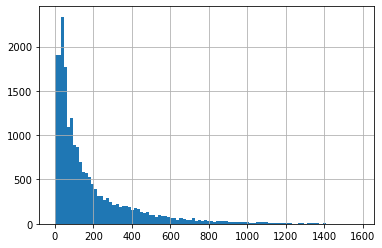

In [57]:
data['days_exposition'].hist(bins = 100, range=(0, 1580));

Возможно пропуски в этом поле - незавершенные объявления с непроданными обоъектами. Изучим распределение дат незавершенных объявлений. Для этого создадим столбец с годом первого размещения объявления.

In [58]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()
(data.query('days_exposition.isna()', engine='python')
 .pivot_table(index = 'year', values ='last_price', aggfunc = 'count'))

,last_price
year,
2014,18
2015,70
2016,67
2017,271
2018,959
2019,1796


Полученный результат не позволяет сделать однозначный вывод о том, что это незакрытые объявления, т.к. объявления, размещенные в 2014-2016 годах (даже если база выгружена по состоянию на 2019 год) стояли бы в продаже 3-5 лет.
Доля условно незакрытых объявлений в выборке - 13,4% и цена ошибки при некорректном заполнении пустот будет высока. Но большая доля объектов приходится на 2019 год (второй по величине - 2018). Если найти максимальную дату размещения объявления в датасете и считать, что база сформирована именно на эту дату, можно найти разницу в днях от этой даты до даты размещения объявления и заполнить пустоты для каждого объявления этим числом дней. Найдем финальную дату размещения объявления. 

In [59]:
data['first_day_exposition'].max()

'2019-05-03T00:00:00'

Последнее размещение объявления в базе было 5 мая 2019 года. Будем условно считать, что база выгружена на эту дату.
Создадим столбец с разницей даты размещения и финальной даты размещения последнего объявления.

In [60]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['diff'] = (data['first_day_exposition'].max()-data['first_day_exposition']).dt.days
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,year,diff
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,57
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,150
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,1352
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,1379
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,318


Столбец first_day_exposition переведен в корректный формат даты/времени. Создадим вспомогательный столбец diff, в который запишем разницу между максимальной датой в датафрейме и датой первой публикации объявления.

In [61]:
import numpy as np
data['days_exposition'] = np.where(data['days_exposition'].isna(), data['diff'], data['days_exposition'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,year,diff
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,120370.370370,2019,57
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,150
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,1352
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,1379
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,318


Перезапишем столбец days_exposition, заполнив в нем пропуски с помощью метода where по условию (если NaN, берем расчетное количество дней, если не NaN, оставляем текущее значение).

In [62]:
len(data[data['days_exposition'].isna()])

0

Проверим наличие NaN в поле days_exposition. Они все заменены на расчетные значения.

### Вывод

## Предобработка данных

Обработаем поле с названием населенных пунктов и приведем их к унифицированным наименованиям.

Приведем поле locality_name к единому регистру, чтобы избежать написания одних и тех же локаций в разных регистрах.

In [63]:
data['locality_name'] = data['locality_name'].str.upper()

In [64]:
data=data.dropna(subset=['locality_name'])

Удалим записи, в которых нет названия населенного пункта, т.к., на мой взгляд, корректно восстановить его не получится. Записей всего 49, доля записей в датасете очень мала.

In [65]:
len(data[data['locality_name'].isna()])

0

In [66]:
data['locality_name'].unique()

array(['САНКТ-ПЕТЕРБУРГ', 'ПОСЁЛОК ШУШАРЫ', 'ГОРОДСКОЙ ПОСЁЛОК ЯНИНО-1',
       'ПОСЁЛОК ПАРГОЛОВО', 'ПОСЁЛОК МУРИНО', 'ЛОМОНОСОВ', 'СЕРТОЛОВО',
       'ПЕТЕРГОФ', 'ПУШКИН', 'ДЕРЕВНЯ КУДРОВО', 'КОММУНАР', 'КОЛПИНО',
       'ПОСЕЛОК ГОРОДСКОГО ТИПА КРАСНЫЙ БОР', 'ГАТЧИНА', 'ПОСЕЛОК МУРИНО',
       'ДЕРЕВНЯ ФЁДОРОВСКОЕ', 'ВЫБОРГ', 'КРОНШТАДТ', 'КИРОВСК',
       'ДЕРЕВНЯ НОВОЕ ДЕВЯТКИНО', 'ПОСЁЛОК МЕТАЛЛОСТРОЙ',
       'ПОСЁЛОК ГОРОДСКОГО ТИПА ЛЕБЯЖЬЕ',
       'ПОСЁЛОК ГОРОДСКОГО ТИПА СИВЕРСКИЙ', 'ПОСЕЛОК МОЛОДЦОВО',
       'ПОСЕЛОК ГОРОДСКОГО ТИПА КУЗЬМОЛОВСКИЙ',
       'САДОВОЕ ТОВАРИЩЕСТВО НОВАЯ РОПША', 'ПАВЛОВСК',
       'ДЕРЕВНЯ ПИККОЛОВО', 'ВСЕВОЛОЖСК', 'ВОЛХОВ', 'КИНГИСЕПП',
       'ПРИОЗЕРСК', 'СЕСТРОРЕЦК', 'ДЕРЕВНЯ КУТТУЗИ', 'ПОСЁЛОК АННИНО',
       'ПОСЕЛОК ГОРОДСКОГО ТИПА ЕФИМОВСКИЙ', 'ПОСЁЛОК ПЛОДОВОЕ',
       'ДЕРЕВНЯ ЗАКЛИНЬЕ', 'ПОСЕЛОК ТОРКОВИЧИ', 'ПОСЕЛОК ПЕРВОМАЙСКОЕ',
       'КРАСНОЕ СЕЛО', 'ПОСЁЛОК ПОНТОННЫЙ', 'СЯСЬСТРОЙ', 'ДЕРЕВНЯ СТАРАЯ',
       'ДЕРЕВНЯ ЛЕСКОЛОВО', '

In [67]:
len(data['locality_name'].unique())

364

Выведем список уникальных записей столбца, почситаем и визуально изучим их. Записей 365. Основные повторяющиеся наименования в названиях населенных пунктов:
- ПОСЕЛОК
- ПОСЁЛОК
- ДЕРЕВНЯ
- ПОСЕЛОК ГОРОДСКОГО ТИПА
- ПОСЁЛОК ГОРОДСКОГО ТИПА
- СЕЛО (с пробелом в конце, т.к. есть населенный пункт КРАСНОЕ СЕЛО)
- ГОРОДСКОЙ ПОСЕЛОК
- ГОРОДСКОЙ ПОСЁЛОК
- САДОВОЕ ТОВАРИЩЕСТВО
- САДОВОДЧЕСКОЕ НЕКОММЕРЧЕСКОЕ ТОВАРИЩЕСТВО
- ПОСЁЛОК ПРИ ЖЕЛЕЗНОДОРОЖНОЙ СТАНЦИИ
- ПОСЕЛОК ПРИ ЖЕЛЕЗНОДОРОЖНОЙ СТАНЦИИ
- КОТТЕДЖНЫЙ ПОСЁЛОК
- КОТТЕДЖНЫЙ ПОСЕЛОК
Также в названиях встречается по несколько пробелов, которые также препятствуют унификации. Сначала заменим везде многократно встречающиеся пробелы на один пробел.

In [68]:
locality_list = list(data['locality_name'].unique())

Создадим оригинальный список унифицированных объектов.

In [69]:
locality_list_uni = []
for name in locality_list:    
    name = ' '.join(str(name).split())
    locality_list_uni.append(name)
locality_list_uni

['САНКТ-ПЕТЕРБУРГ',
 'ПОСЁЛОК ШУШАРЫ',
 'ГОРОДСКОЙ ПОСЁЛОК ЯНИНО-1',
 'ПОСЁЛОК ПАРГОЛОВО',
 'ПОСЁЛОК МУРИНО',
 'ЛОМОНОСОВ',
 'СЕРТОЛОВО',
 'ПЕТЕРГОФ',
 'ПУШКИН',
 'ДЕРЕВНЯ КУДРОВО',
 'КОММУНАР',
 'КОЛПИНО',
 'ПОСЕЛОК ГОРОДСКОГО ТИПА КРАСНЫЙ БОР',
 'ГАТЧИНА',
 'ПОСЕЛОК МУРИНО',
 'ДЕРЕВНЯ ФЁДОРОВСКОЕ',
 'ВЫБОРГ',
 'КРОНШТАДТ',
 'КИРОВСК',
 'ДЕРЕВНЯ НОВОЕ ДЕВЯТКИНО',
 'ПОСЁЛОК МЕТАЛЛОСТРОЙ',
 'ПОСЁЛОК ГОРОДСКОГО ТИПА ЛЕБЯЖЬЕ',
 'ПОСЁЛОК ГОРОДСКОГО ТИПА СИВЕРСКИЙ',
 'ПОСЕЛОК МОЛОДЦОВО',
 'ПОСЕЛОК ГОРОДСКОГО ТИПА КУЗЬМОЛОВСКИЙ',
 'САДОВОЕ ТОВАРИЩЕСТВО НОВАЯ РОПША',
 'ПАВЛОВСК',
 'ДЕРЕВНЯ ПИККОЛОВО',
 'ВСЕВОЛОЖСК',
 'ВОЛХОВ',
 'КИНГИСЕПП',
 'ПРИОЗЕРСК',
 'СЕСТРОРЕЦК',
 'ДЕРЕВНЯ КУТТУЗИ',
 'ПОСЁЛОК АННИНО',
 'ПОСЕЛОК ГОРОДСКОГО ТИПА ЕФИМОВСКИЙ',
 'ПОСЁЛОК ПЛОДОВОЕ',
 'ДЕРЕВНЯ ЗАКЛИНЬЕ',
 'ПОСЕЛОК ТОРКОВИЧИ',
 'ПОСЕЛОК ПЕРВОМАЙСКОЕ',
 'КРАСНОЕ СЕЛО',
 'ПОСЁЛОК ПОНТОННЫЙ',
 'СЯСЬСТРОЙ',
 'ДЕРЕВНЯ СТАРАЯ',
 'ДЕРЕВНЯ ЛЕСКОЛОВО',
 'ПОСЁЛОК НОВЫЙ СВЕТ',
 'СЛАНЦЫ',
 'СЕЛО ПУТИЛОВО',
 'ИВАНГОРОД',
 '

Создадим пустой список locality_list_uni, переберем циклом все элементы списка, применим к каждому метод split и вставим везде по одному пробелу. Метод str преобразует каждый элемент списка в строковый тип, без его применения цикл выдает ошибку и показывает, что в списке где-то есть элемент float.

In [70]:
replacing_list = ['САДОВОДЧЕСКОЕ НЕКОММЕРЧЕСКОЕ ТОВАРИЩЕСТВО','ПОСЁЛОК ПРИ ЖЕЛЕЗНОДОРОЖНОЙ СТАНЦИИ','ПОСЕЛОК ПРИ ЖЕЛЕЗНОДОРОЖНОЙ СТАНЦИИ','ПОСЕЛОК ГОРОДСКОГО ТИПА','ПОСЁЛОК ГОРОДСКОГО ТИПА','САДОВОЕ ТОВАРИЩЕСТВО','КОТТЕДЖНЫЙ ПОСЁЛОК','КОТТЕДЖНЫЙ ПОСЕЛОК','ГОРОДСКОЙ ПОСЕЛОК','ГОРОДСКОЙ ПОСЁЛОК','ПОСЕЛОК','ПОСЁЛОК','ДЕРЕВНЯ','СЕЛО ']

Создадим список значений в наименовании, которые надо заменить на пустоту. Список расположим по убыванию количества символов в элементах, т.к. цикл пойдет по списку по порядку и если, например, элемент "поселок" будет предшествовать элементу "поселок городского типа", то цикл возьмет слово "поселок" и заменит его, оставив в названии слова "городского типа", что не позволит получить унифицированные наименования населенных пунктов.

In [71]:
locality_list_uni1 = []
for name in locality_list_uni:    
    for repl_name in replacing_list:
        if repl_name in name:         
            name = str(name).replace(repl_name,'')
            name = ' '.join(str(name).split())
            locality_list_uni1.append(name)
    if not name in locality_list_uni1:
        locality_list_uni1.append(name)
locality_list_uni1

['САНКТ-ПЕТЕРБУРГ',
 'ШУШАРЫ',
 'ЯНИНО-1',
 'ПАРГОЛОВО',
 'МУРИНО',
 'ЛОМОНОСОВ',
 'СЕРТОЛОВО',
 'ПЕТЕРГОФ',
 'ПУШКИН',
 'КУДРОВО',
 'КОММУНАР',
 'КОЛПИНО',
 'КРАСНЫЙ БОР',
 'ГАТЧИНА',
 'МУРИНО',
 'ФЁДОРОВСКОЕ',
 'ВЫБОРГ',
 'КРОНШТАДТ',
 'КИРОВСК',
 'НОВОЕ ДЕВЯТКИНО',
 'МЕТАЛЛОСТРОЙ',
 'ЛЕБЯЖЬЕ',
 'СИВЕРСКИЙ',
 'МОЛОДЦОВО',
 'КУЗЬМОЛОВСКИЙ',
 'НОВАЯ РОПША',
 'ПАВЛОВСК',
 'ПИККОЛОВО',
 'ВСЕВОЛОЖСК',
 'ВОЛХОВ',
 'КИНГИСЕПП',
 'ПРИОЗЕРСК',
 'СЕСТРОРЕЦК',
 'КУТТУЗИ',
 'АННИНО',
 'ЕФИМОВСКИЙ',
 'ПЛОДОВОЕ',
 'ЗАКЛИНЬЕ',
 'ТОРКОВИЧИ',
 'ПЕРВОМАЙСКОЕ',
 'КРАСНОЕ СЕЛО',
 'ПОНТОННЫЙ',
 'СЯСЬСТРОЙ',
 'СТАРАЯ',
 'ЛЕСКОЛОВО',
 'НОВЫЙ СВЕТ',
 'СЛАНЦЫ',
 'ПУТИЛОВО',
 'ИВАНГОРОД',
 'ШЛИССЕЛЬБУРГ',
 'НИКОЛЬСКОЕ',
 'ЗЕЛЕНОГОРСК',
 'СОСНОВЫЙ БОР',
 'НОВЫЙ СВЕТ',
 'ОРЖИЦЫ',
 'КАЛЬТИНО',
 'РОМАНОВКА',
 'БУГРЫ',
 'БУГРЫ',
 'РОЩИНО',
 'КИРИШИ',
 'ЛУГА',
 'ВОЛОСОВО',
 'ОТРАДНОЕ',
 'ПАВЛОВО',
 'ОРЕДЕЖ',
 'КОПОРЬЕ',
 'КРАСНЫЙ БОР',
 'МОЛОДЁЖНОЕ',
 'ТИХВИН',
 'ПОБЕДА',
 'НУРМА',
 'СИНЯВИНО',
 'ТОСНО',
 'КУЗЬМОЛО

Создадим пустой список, в который будем добавлять очищенные названия населенных пунктов. Внешний цикл будет перебирать список унифицированных объектов. Во внутреннем мы будем сопоставлять имена элементов унифицированных объектов и проверять, содержатся ли в них записи из списка значений, которые надо заменить на пустоту. Если такое встречается, мы заменяем его на пустоту и еще раз применяем метод split чтобы избежать появления лишних пробелов. Затем append добавляет "чистую" запись в пустой список очищенных значений.

В списке могут встретиться значения, в которых нет частей "поселок", "деревня" или еще каких-либо значений из списка replacing_list, например "САНКТ-ПЕТЕРБУРГ". Цикл пропустит его и не добавит в список. Для такого случая предусмотрим условие и запишем его во внешнем цикле. После выполнения внутреннего цикла проверим, появилось ли значение name в списке. Если нет, добавим его методом append принудительно.

In [72]:
locality_list_uni1.insert(50, 'МУРИНО')
locality_list_uni1.insert(58, 'КУДРОВО')
locality_list_uni1.remove('ЖИЛ')

In [73]:
len(locality_list_uni1)

364

In [74]:
len(locality_list)

364

In [75]:
len(locality_list_uni)

364

Сопоставим количество полученных "чистых" наименований населенных пунктов и первоначального унифицированного списка. Новый список короче на 1 запись. Поселок Мурино встречается 2 раза, в начале списка с записью "Мурино" и на 50 позиции как "Поселок Мурино". При проверке условие видит его и не добавляет. Добавим его методом insert вручную.
После добавления списки становятся идентичны по размеру.

In [76]:
locality_list_uni2 = pd.concat([pd.Series(locality_list_uni), pd.Series(locality_list_uni1)], axis =1)
locality_list_uni2.columns = ['locality_name', 'nw_loc_nm']
locality_list_uni2.tail(20)

,locality_name,nw_loc_nm
344,ПОСЁЛОК ПАНСИОНАТ ЗЕЛЁНЫЙ БОР,ПАНСИОНАТ ЗЕЛЁНЫЙ БОР
345,ДЕРЕВНЯ НЕНИМЯКИ,НЕНИМЯКИ
346,ПОСЕЛОК ПАНСИОНАТ ЗЕЛЁНЫЙ БОР,ПАНСИОНАТ ЗЕЛЁНЫЙ БОР
347,ДЕРЕВНЯ СНЕГИРЁВКА,СНЕГИРЁВКА
348,ДЕРЕВНЯ РАППОЛОВО,РАППОЛОВО
349,ДЕРЕВНЯ ПУСТЫНКА,ПУСТЫНКА
350,ПОСЕЛОК РАБИТИЦЫ,РАБИТИЦЫ
351,ДЕРЕВНЯ БОЛЬШОЙ САБСК,БОЛЬШОЙ САБСК
352,ДЕРЕВНЯ РУССКО,РУССКО
353,ДЕРЕВНЯ ЛУППОЛОВО,ЛУППОЛОВО


Создадим датафрейм из 2 списков, переименуем столбцы и выведем справочник на превью. Визуально справочник корректен.

In [77]:
data = data.merge(locality_list_uni2, on = 'locality_name')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,year,diff,nw_loc_nm
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,57.0,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ
1,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ
2,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ
3,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ
4,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,11634.0,0.0,NaN,0.0,NaN,15.0,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ


Объединим датафрейм и справочник по оригинальным наименованиям населенных пунктов. В датафрейме появился столбец nw_loc_nm с унифицированными названиями локаций.

In [78]:
len(data[data['nw_loc_nm'].isna()])

0

Поле с наименованиями населенных пунктов полностью заполнено.

In [79]:
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype(int)

Заменим значения NaN в столбце floors_total на нули и преобразуем значения в целочисленные.

In [80]:
def fill_floor_tot(row):
    fl_tot = row['floors_total']
    fl = row['floor']
    if fl<6 and fl_tot==0:
        return 5
    elif fl<10 and fl_tot==0:
        return  9
    elif fl <17 and fl_tot==0:
        return  16
    elif fl > 16 and fl_tot==0:
        return  25
    else:
        return fl_tot
data['floors_total_fin'] = data.apply(fill_floor_tot, axis = 1)

Напишем функцию, которая подставляет значения этажности по условию в объекты с пропущенной этажностью. Ориентируемся на типовые дома, которых большинство в жилом фонде (5, 9, 16 и 25-этажные). Погрешность возможна, но она минимальна из-за малой доли пропусков.

In [81]:
len(data[data['floors_total_fin'].isna()])

0

Поле с этажностью полностью заполнено.

In [82]:
liv_area_dict = data.pivot_table(index=['total_area', 'rooms'], values ='living_area', aggfunc = 'median')
liv_area_dict.reset_index(inplace = True)
new_name = ['total_area', 'rooms', 'living_area_fin']
liv_area_dict.set_axis(new_name, axis = 'columns', inplace = True)
liv_area_dict.head()

,total_area,rooms,living_area_fin
0,12.0,1,10.0
1,13.0,1,10.0
2,14.0,1,11.0
3,15.5,0,10.0
4,16.0,0,13.0


Создадим справочник медиан для заполнения пропусков в поле living_area. Критериями будут общая площадь объекта и этажность дома.

In [83]:
data = data.merge(liv_area_dict, on = ['total_area', 'rooms'], how = 'left')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,year,diff,nw_loc_nm,floors_total_fin,living_area_fin
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,57.0,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ,16,57.30
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ,5,32.00
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ,14,54.00
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ,14,44.50
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,0.0,NaN,15.0,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ,24,34.65


Объединим таблицы и добавим медианные значения жилой площади.

In [84]:
len(data[data['living_area_fin'].isna()])

211

In [85]:
data=data.dropna(subset=['living_area_fin'])

Осталось 211 незаполненных объектов с жилой площадью. Удалим эти записи, их доля в датасете меньше 1%.

In [86]:
def ceil_hgt(row):
    ceil_h = row['ceiling_height']
    if ceil_h>4.5:
        return 4.5
    elif ceil_h<2.5:
        return 2.5
    else:
        return ceil_h
data['ceiling_height_fin'] = data.apply(ceil_hgt, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,year,diff,nw_loc_nm,floors_total_fin,living_area_fin,ceiling_height_fin
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,57.0,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ,16,57.30,2.70
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,2.0,574.0,558.0,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ,5,32.00,NaN
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ,14,54.00,NaN
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121.0,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ,14,44.50,3.03
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,0.0,NaN,15.0,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ,24,34.65,NaN


Уберем вбросы и приравняем потолки выше 4,5 м к 4,5 м и ниже 2,5 м к 2,5 м.

In [87]:
len(data[data['ceiling_height'].isna()])

9048

In [88]:
ceiling_high_dict = data.pivot_table(index='floors_total_fin', values ='ceiling_height_fin', aggfunc = 'median')
ceiling_high_dict.reset_index(inplace = True)
new_name = ['floors_total_fin',  'ceiling_height_fin1']
ceiling_high_dict.set_axis(new_name, axis = 'columns', inplace = True)
ceiling_high_dict.head()

,floors_total_fin,ceiling_height_fin1
0,1,2.80
1,2,2.70
2,3,2.80
3,4,3.00
4,5,2.55


Создадим справочник медианной вывсоты потолков в зависимости от этажности дома. Примечание: здесь возможны искажения, т.к. несмотря на то, что жилой фонд преимущественно состоит из типовых домов (гипотеза), могут попадаться дома с потолками, значительно отличающимися от типовых. Причем разница на 10 см в случае высоты потолков - это уже значительная величина. Возможно, медиана сможет сгладить погрешность, но для отдельных нетиповых объектов она все равно будет велика.

In [89]:
data = data.merge(ceiling_high_dict, on = 'floors_total_fin', how = 'left')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m2,year,diff,nw_loc_nm,floors_total_fin,living_area_fin,ceiling_height_fin,ceiling_height_fin1
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,755.0,57.0,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ,16,57.30,2.70,2.70
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,574.0,558.0,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ,5,32.00,NaN,2.55
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,234.0,424.0,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ,14,54.00,NaN,2.60
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,48.0,121.0,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ,14,44.50,3.03,2.60
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,15.0,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ,24,34.65,NaN,2.75


In [90]:
data['ceiling_height_fin'].fillna(data['ceiling_height_fin1'],inplace = True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m2,year,diff,nw_loc_nm,floors_total_fin,living_area_fin,ceiling_height_fin,ceiling_height_fin1
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,755.0,57.0,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ,16,57.30,2.70,2.70
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,574.0,558.0,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ,5,32.00,2.55,2.55
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,234.0,424.0,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ,14,54.00,2.60,2.60
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,48.0,121.0,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ,14,44.50,3.03,2.60
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,15.0,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ,24,34.65,2.75,2.75


In [91]:
len(data[data['ceiling_height_fin'].isna()])

1

Заменим значения в столбце ceiling_height_fin на медианные. Метод len показывает одно значение NaN.

In [92]:
kitch_area_dict = data.pivot_table(index=['floors_total_fin', 'rooms'], values ='kitchen_area', aggfunc = 'median')
kitch_area_dict.reset_index(inplace = True)
new_name = ['floors_total_fin', 'rooms', 'kitch_area_fin']
kitch_area_dict.set_axis(new_name, axis = 'columns', inplace = True)
kitch_area_dict.head()

,floors_total_fin,rooms,kitch_area_fin
0,1,1,10.30
1,1,2,7.00
2,1,3,10.00
3,2,1,7.00
4,2,2,6.22


Создадим справочник kitch_area_dict с медианными значениями площади кухонь в зависимости от этажности дома и количеству комнат.

In [93]:
data = data.merge(kitch_area_dict, on = ['rooms', 'floors_total_fin'], how = 'left')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_m2,year,diff,nw_loc_nm,floors_total_fin,living_area_fin,ceiling_height_fin,ceiling_height_fin1,kitch_area_fin
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,57.0,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ,16,57.30,2.70,2.70,13.00
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,558.0,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ,5,32.00,2.55,2.55,7.00
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,424.0,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ,14,54.00,2.60,2.60,10.65
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,121.0,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ,14,44.50,3.03,2.60,9.00
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,15.0,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ,24,34.65,2.75,2.75,12.00


In [94]:
len(data[data['kitch_area_fin'].isna()])

196

In [95]:
data=data.dropna(subset=['kitch_area_fin'])

Добавим поле kitch_area_fin в датасет и проверим количество незаполненных записей. Удалим пустые записи.

In [96]:
center_nearest_dict = (data.query('~cityCenters_nearest.isna() and nw_loc_nm != "САНКТ-ПЕТЕРБУРГ"', engine = 'python')
                       .pivot_table(index = 'nw_loc_nm', values = 'cityCenters_nearest')
                       .reset_index())
new_col_nm = ['nw_loc_nm', 'cc_mean_nearest']
center_nearest_dict.set_axis(new_col_nm, axis = 'columns', inplace = True)
center_nearest_dict

,nw_loc_nm,cc_mean_nearest
0,АЛЕКСАНДРОВСКАЯ,27468.000000
1,БЕЛООСТРОВ,38868.000000
2,ЗЕЛЕНОГОРСК,54617.583333
3,КОЛПИНО,32113.771513
4,КРАСНОЕ СЕЛО,30020.284091
5,КРОНШТАДТ,49195.726316
6,ЛЕВАШОВО,25727.000000
7,ЛИСИЙ НОС,27613.333333
8,ЛОМОНОСОВ,50739.969697
9,МЕТАЛЛОСТРОЙ,27559.030769


Создадим справочник средних расстояний районов до центра для заполнения пропусков в поле cityCenters_nearest. Исключим из него населенный пункт Санкт-Петербург, т.к. в городе расстояние до центра расстояние может сильно варьироваться, а для района погрешность будет не такой большой.

In [97]:
data = data.merge(center_nearest_dict, on = 'nw_loc_nm', how = 'left')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_m2,year,diff,nw_loc_nm,floors_total_fin,living_area_fin,ceiling_height_fin,ceiling_height_fin1,kitch_area_fin,cc_mean_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ,16,57.30,2.70,2.70,13.00,NaN
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ,5,32.00,2.55,2.55,7.00,NaN
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ,14,54.00,2.60,2.60,10.65,NaN
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ,14,44.50,3.03,2.60,9.00,NaN
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ,24,34.65,2.75,2.75,12.00,NaN


Добавим столбец cc_mean_nearest в основной датафрейм.

In [98]:
data['cityCenters_nearest'].fillna(data['cc_mean_nearest'],inplace = True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_m2,year,diff,nw_loc_nm,floors_total_fin,living_area_fin,ceiling_height_fin,ceiling_height_fin1,kitch_area_fin,cc_mean_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,120370.370370,2019,57,САНКТ-ПЕТЕРБУРГ,16,57.30,2.70,2.70,13.00,NaN
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,92785.714286,2015,1352,САНКТ-ПЕТЕРБУРГ,5,32.00,2.55,2.55,7.00,NaN
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,408176.100629,2015,1379,САНКТ-ПЕТЕРБУРГ,14,54.00,2.60,2.60,10.65,NaN
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,100000.000000,2018,318,САНКТ-ПЕТЕРБУРГ,14,44.50,3.03,2.60,9.00,NaN
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,110544.692737,2019,15,САНКТ-ПЕТЕРБУРГ,24,34.65,2.75,2.75,12.00,NaN


Заполним пропуски столбца cityCenters_nearest значениями из справочника и посчитаем количество пропусков после заполнения.

In [99]:
len(data[data['cityCenters_nearest'].isna()])

4804

Количество пропущенных записей сократилось с 5518 до 4804.

## Расчёты и добавление результатов в таблицу

In [100]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [101]:
data['month'] = data['first_day_exposition'].dt.month

In [102]:
data['year'] = data['first_day_exposition'].dt.year

Добавим столбец с днем недели, месяцем и годом в датафрейм.

In [103]:
def floor_grp(row):
    flr = row['floor']
    ttl_flr = row['floors_total_fin']
    if flr==1:
        return 'ПЕРВЫЙ'
    elif flr==ttl_flr:
        return 'ПОСЛЕДНИЙ'
    else:
        return 'ДРУГОЙ'
data['floor_group'] = data.apply(floor_grp, axis =1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,nw_loc_nm,floors_total_fin,living_area_fin,ceiling_height_fin,ceiling_height_fin1,kitch_area_fin,cc_mean_nearest,weekday,month,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,САНКТ-ПЕТЕРБУРГ,16,57.30,2.70,2.70,13.00,NaN,3,3,ДРУГОЙ
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,САНКТ-ПЕТЕРБУРГ,5,32.00,2.55,2.55,7.00,NaN,3,8,ДРУГОЙ
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,САНКТ-ПЕТЕРБУРГ,14,54.00,2.60,2.60,10.65,NaN,4,7,ДРУГОЙ
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,САНКТ-ПЕТЕРБУРГ,14,44.50,3.03,2.60,9.00,NaN,1,6,ДРУГОЙ
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,САНКТ-ПЕТЕРБУРГ,24,34.65,2.75,2.75,12.00,NaN,3,4,ДРУГОЙ


Добавим варианты этажа квартиры по 3 вариантам: первый, последний, другой.
Примечание: возможно еще было бы выделить общепринято пользующийся спросом блок из второго и третьего этажа (для проверки гипотезы быстрее ли они продаются).

In [104]:
data['living_to_total_sq'] = data['living_area_fin']/data['total_area']

In [105]:
data['kitchen_to_total_sq'] = data['kitch_area_fin']/data['total_area']

Добавим в датасет метрику соотношения жилой и общей площади и метрику соотношения площади кухни и общей площади объекта.

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23243 entries, 0 to 23242
Data columns (total 37 columns):
total_images            23243 non-null int64
last_price              23243 non-null float64
total_area              23243 non-null float64
first_day_exposition    23243 non-null datetime64[ns]
rooms                   23243 non-null int64
ceiling_height          14309 non-null float64
floors_total            23243 non-null int64
living_area             21567 non-null float64
floor                   23243 non-null int64
is_apartment            2741 non-null object
studio                  23243 non-null bool
open_plan               23243 non-null bool
kitchen_area            21274 non-null float64
balcony                 11927 non-null float64
locality_name           23243 non-null object
airports_nearest        17838 non-null float64
cityCenters_nearest     18439 non-null float64
parks_around3000        17862 non-null float64
parks_nearest           7951 non-null float64
ponds_aro

Проверим датафрейм перед началом EDA. В изначальном варианте датафрейма было 23699 записей, после удаления пустых записей стало 23243, что составляет 98,1% от первоначального объема данных. Корректировка некритична.

## Исследовательский анализ данных

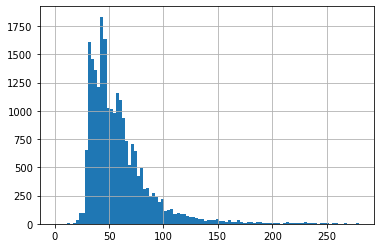

In [107]:
data['total_area'].hist(bins = 100, range = (0,280));

Проанализируем распределение площадей квартир. Гистограмма показывает распределение, похожее на распределение Пуассона. Первый пик - около 28 м2, похоже на типовые однокомнатные квартиры, второй пик - это квартиры около 45 м2 (похоже на типовые двухкомнатные квартиры), и третий - около 65 м2 (похоже на трехкомнатные). Если смотреть от меньшей площади, в районе примерно 12м2 заметен какой-то артефакт, затем небольшой подъем (похоже на комнаты). Изучим этот артефакт подробнее.

In [108]:
min_sq = data['total_area'].min()
data.query('total_area == @min_sq')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_fin,ceiling_height_fin,ceiling_height_fin1,kitch_area_fin,cc_mean_nearest,weekday,month,floor_group,living_to_total_sq,kitchen_to_total_sq
13038,4,2400000.0,12.0,2017-07-19,1,2.55,5,10.0,2,NaN,...,10.0,2.55,2.55,6.4,NaN,2,7,ДРУГОЙ,0.833333,0.533333


Объект площадью 12м2, жилая площадь - 10м2, стоимость - 2 400 тыс.руб. по совокупности признаков объект похож на студию. Вывод - объект реальный, вбросом не является.

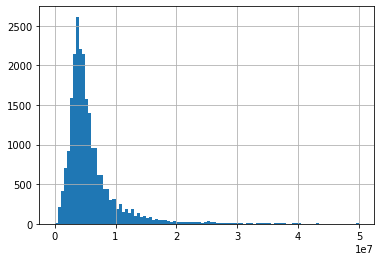

In [109]:
data['last_price'].hist(bins = 100, range = (0,50000000));

Проанализируем распределение стоимостей объектов. Гистограмма показывает, что стоимость большинства объектов -5-6 млн. Распределение также близко к нормальному.

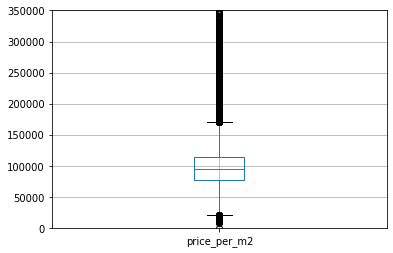

In [110]:
import matplotlib.pyplot as plt
plt.ylim(0, 350000)
data.boxplot(column = 'price_per_m2');

Нормальные значения цены за квадратный метр - от 25 до 170 тыс/м2. Выше и ниже - нетипичные значения. 2 квартиль - от 75 до 130 тыс/м2.

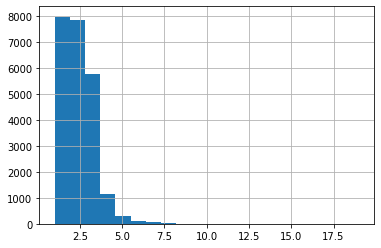

In [111]:
data['rooms'].hist(bins = 20);

На гистограмме видно, что в лидерах продаж - однокомнатные объекты. С небольшим отставнием и почти на одном уровне идут двухкомнатные. Трехкомнатные - на третьем месте со значительным отставанием примерно в 2 тыс. объявлений.

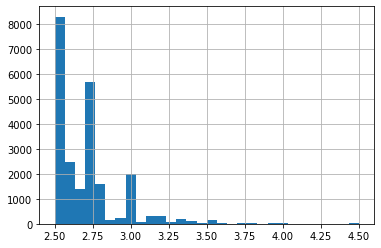

In [112]:
data['ceiling_height_fin'].hist(bins=30);

Гистограмма распределения высоты потолков сформирована на основе уже обработанного столбца ceiling_height (аномально низкие и высокие значения заменены на 2,5 и 4,5 метра соотетственно и пропуски заменены медианами в зависимости от этажности объекта. Посмотрим, отличается ли распределение необработанного столбца с исключением значений NaN

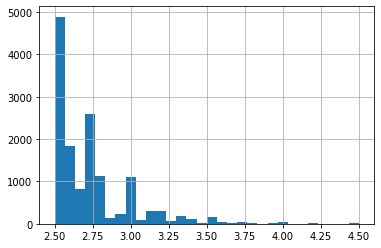

In [113]:
sample = data.query('~ceiling_height.isna()')
sample['ceiling_height'].hist(bins = 30, range = (2.5, 4.5));

Формы гистограмм до и после предобработки данных практически идентичны, что говорит о том, что замена значений медианами существенно не исказила данные. Но количество объектов с медианой 2,75м увеличилось в общей доле, это следует учесть впоследствии при построении корреляционных моделей.

In [114]:
data['days_exposition'].describe()

count    23243.000000
mean       186.352966
std        233.672262
min          0.000000
25%         43.000000
50%         95.000000
75%        238.000000
max       1618.000000
Name: days_exposition, dtype: float64

Из описательной статистики поля days_exposition видно, что среднее время продажи - 186 дней, а медианное - 95 дней. Скорее всего, на среднее арифметическое ориентироваться нельзя, оно подвержено аномально высоким значениям дней продажи. Первый квартиль равено 45 дней, что похоже на показатель "быстрой продажи". Построим боксплот и гистограмму и посмотрим на распределение показателя.

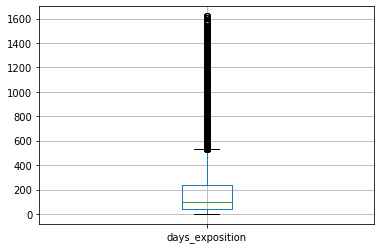

In [115]:
data.boxplot(column = 'days_exposition');

Исходя из расположения boxplot средняя продолжительность продажи - от 43 до 95 дней. Верхний "ус" boxplot заканчивается примерно на 550 днях, значит выше уже идут аномальные значения. Обычно продажа занимает от 45 до 238 дней. Очень быстрой продажей можно считать продажу до 43 дней.

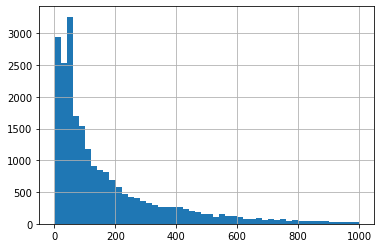

In [116]:
data['days_exposition'].hist(bins = 50, range = (1, 1000));

На 50 днях явно заметна аномалия. Данное значение встречается чаще всего, можно попробовать извлечь его с помощью функции "мода".

In [117]:
import statistics
md = statistics.mode(data['days_exposition'])
md

45.00000000000001

45 дней - время, за которое наиболее часто продается квартира. 1,5 месяца, для ликвидного объекта звучит правдоподобно. Попробуем отфильтровать это значение и убрать редкие значения, основываясь на значениях с boxplot и вновь посмотреть на гистограмму.

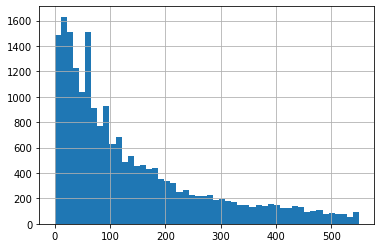

In [118]:
sample_days_exp = data.query('days_exposition!=@md and days_exposition<550')
sample_days_exp['days_exposition'].hist(bins = 50, range = (0,550));

Распределение не стало ровнее, появились еще 2 пика.

In [119]:
md1 = statistics.mode(sample_days_exp['days_exposition'])
md1

60.0

Следующая мода - 60 дней. Также правдоподобно для ликвидного объекта. Отфильтруем и посмотрим на третью моду.

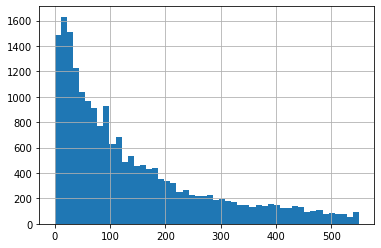

In [120]:
sample_days_exp1 = data.query('days_exposition!=@md1 and days_exposition!=@md')
sample_days_exp1['days_exposition'].hist(bins = 50, range = (0,550));

In [121]:
md2 = statistics.mode(sample_days_exp1['days_exposition'])
md2

7.0

Третья аномалия - 7 дней продажи. Этот срок можно отнести к категории "очень быстро". В итоге можно выделить 3 наиболее часто встречающихся значения времени продаж: 7, 45 и 60 дней. Если первое  - аномально быстрое, то два других находятся внутри ящика боксплота и не являются вбросами. Но сравним среднюю стоимость квадратного метра для всех трех значений.

In [122]:
(data.query('days_exposition==@md or days_exposition==@md1 or days_exposition==@md2')
 .pivot_table(index = 'days_exposition', values = 'price_per_m2', aggfunc =['mean', 'count']))

,mean,count
,price_per_m2,price_per_m2
days_exposition,,
7.0,99539.283041,260
45.0,73371.868552,859
60.0,102742.842565,545


Прямой зависимости от цены за метр не прослеживается. Если при средней стоимости 73 тыс/м2 объект уходит за 45 дней, то объекты со стоимостью метра под 100 тыс. аномально быстро продаются за неделю, а близкие по цене под 102 тыс. продаются 2 месяца. Проанализируем распределение цен на объекты, продающиеся за неделю, их 260.

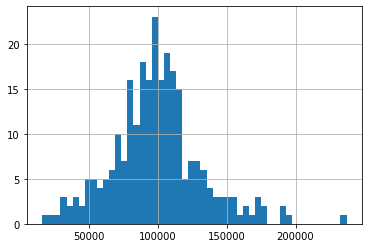

In [123]:
seven_days = data.query('days_exposition == @md2')
seven_days['price_per_m2'].hist(bins = 50);


In [124]:
seven_days['price_per_m2'].describe()

count       260.000000
mean      99539.283041
std       32570.792456
min       16363.636364
25%       80337.892196
50%       98601.330203
75%      114498.597475
max      236966.824645
Name: price_per_m2, dtype: float64

Силуэт гистограммы напоминает гистограмму нормального распределения. Т.к. это продажа квартир и продавцы стараются подстраиваться под общепризнанную цену за квадратный метр в зависимости от параметров квартиры, часто повторяющиеся значения могут быть обусловлены этим фактором (гипотеза). Распределение цен за квадратный метр также на первый взгляд не выявило аномалий, т.к. минимальная цена за квадратный метр может принадлежать объекту, значительно удаленному от центра города. Проверим эту гипотезу.

In [125]:
min_sev_ds = seven_days['price_per_m2'].min()
seven_days.query('price_per_m2==@min_sev_ds').pivot_table(index = ['locality_name','nw_loc_nm','total_area','rooms'], values = 'last_price')

,,,,last_price
locality_name,nw_loc_nm,total_area,rooms,
БОКСИТОГОРСК,БОКСИТОГОРСК,44.0,2,720000.0


Населенный пункт находится примерно на расстоянии 190 км от Санкт-Петербурга. Возможно, цена правдоподобна.

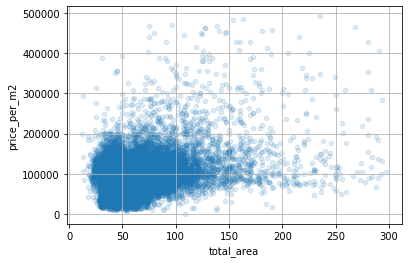

In [126]:
sample_price_area = data.query('total_area<300 and price_per_m2<500000')
sample_price_area.plot(x = 'total_area', y = 'price_per_m2', kind = 'scatter', grid = True,alpha=0.15);

In [127]:
sample_price_area['total_area'].corr(sample_price_area['price_per_m2'])

0.26866754830538986

График показывает отсутствие зависимости между площадью и ценой за квадратный метр. Коэффициент корреляции подтверждает это, 0,26 очень далек от 1. 

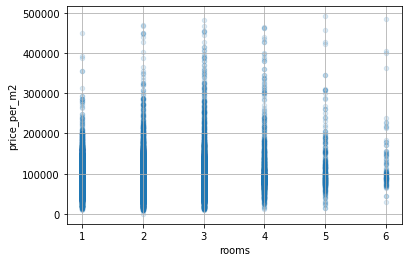

In [128]:
sample_price_rooms = data.query('rooms<7 and price_per_m2<500000')
sample_price_rooms.plot(x = 'rooms', y = 'price_per_m2', kind = 'scatter', grid = True,alpha=0.15);

In [129]:
sample_price_rooms['rooms'].corr(sample_price_rooms['price_per_m2'])

0.01588638991736305

Из диаграммы видно, что связи между количеством комнат и ценой за квадратный метр нет, что подтверждается низким коэффициентом корреляции.

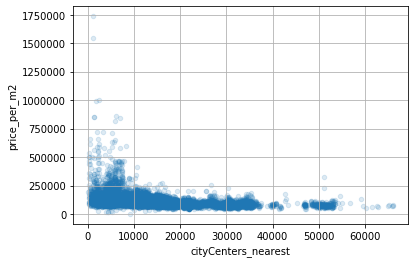

In [130]:
sample_price_nearest = data.query('~cityCenters_nearest.isna()', engine = 'python')
sample_price_nearest.plot(x = 'cityCenters_nearest', y = 'price_per_m2', kind = 'scatter', grid = True,alpha=0.15);

In [131]:
sample_price_rooms['cityCenters_nearest'].corr(sample_price_rooms['price_per_m2'])

-0.38363985111936383

График показывает слабую обратную корреляцию, с удалением от центра цена за квадратный метр падает. Если в радиусе 10 км от центра цена метра может достигать 500 тыс. и выше, то для 20 км стоимость в 250 тыс - уже аномалия, основная масса объектов продается по цене примерно 100 тыс/м2 и ниже. Несмотря на низкий коэффициент (0,38) на графике тенденция прослеживается явно.

In [132]:
data.pivot_table(index = 'floor_group', values = 'price_per_m2', aggfunc = 'median').sort_values(by = 'price_per_m2')

,price_per_m2
floor_group,
ПЕРВЫЙ,81111.111111
ПОСЛЕДНИЙ,87625.281390
ДРУГОЙ,98164.613170


Объекты на первых этажах продаются по минимальной цене за квадратный метр. Дороже - объекты на последних этажах. Выше всего стоимость квадратного метра у объектов, расположенных не на первом и не на последнем этаже.
Но вследствии того, что пропуски этажности домов были заполнены по условию, возможны искажения. Проверим этажность объектов на непредобработанном датасете, исключив значения NaN

In [133]:
sample_floors = data.query('~floors_total.isna()',engine = 'python')

In [134]:
def floor_grp_first(row):
    flr = row['floor']
    ttl_flr = row['floors_total']
    if flr==1:
        return 'ПЕРВЫЙ'
    elif flr==ttl_flr:
        return 'ПОСЛЕДНИЙ'
    else:
        return 'ДРУГОЙ'
sample_floors['floor_group_frst'] = sample_floors.apply(floor_grp_first, axis =1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_fin,ceiling_height_fin,ceiling_height_fin1,kitch_area_fin,cc_mean_nearest,weekday,month,floor_group,living_to_total_sq,kitchen_to_total_sq
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,57.30,2.70,2.70,13.00,NaN,3,3,ДРУГОЙ,0.530556,0.120370
1,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,32.00,2.55,2.55,7.00,NaN,3,8,ДРУГОЙ,0.571429,0.125000
2,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,54.00,2.60,2.60,10.65,NaN,4,7,ДРУГОЙ,0.339623,0.066981
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,44.50,3.03,2.60,9.00,NaN,1,6,ДРУГОЙ,0.445000,0.090000
4,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,34.65,2.75,2.75,12.00,NaN,3,4,ДРУГОЙ,0.483939,0.167598


Создадим датасет sample_floor, исключив пропущенные значения floors_total и ранжируем этажность в зависимости от столбца floors_total.

In [135]:
sample_floors.pivot_table(index = 'floor_group_frst', values = 'price_per_m2', aggfunc = 'median').sort_values(by = 'price_per_m2')

,price_per_m2
floor_group_frst,
ПЕРВЫЙ,81111.111111
ПОСЛЕДНИЙ,87511.394713
ДРУГОЙ,98159.509202


Соотношение сохранилось, значит заполнение пропущенных значений было произведено корректно. Гипотеза о зависимости этажа и цены за метр подтверждается, последние этажи дороже первых, а промежуточные - дороже первых и последних.

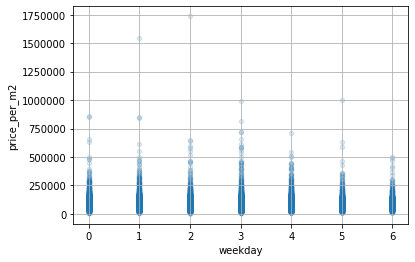

In [136]:
data.plot(x = 'weekday', y = 'price_per_m2', kind = 'scatter', grid = True,alpha=0.15);

In [137]:
data['price_per_m2'].corr(data['weekday'])

-0.012607163089632787

In [138]:
data.pivot_table(index = 'weekday', values = 'price_per_m2', aggfunc = 'median').sort_values(by = 'price_per_m2', ascending =False)

,price_per_m2
weekday,
1,95510.901274
2,95376.837655
3,95019.841270
0,94667.066107
4,94418.293571
6,94336.461126
5,93109.827858


Коэффициент корреляции близок к 0, но на графике видно, что на объекты, объявления на которые размещены в рабочие дни, имеют стоимость квадратного метра выше, чем в объявлениях выходного дня. Самые "дорогие" объекты размещены в понедельник-вторник-среду. Как неподтвержденная гипотеза - это объявления риелторских агентств, которые не работают в выходные и закладывают в цену свой % за услуги. Проверить гипотезу можно было бы если бы в датасете было поле "Тип продавца".

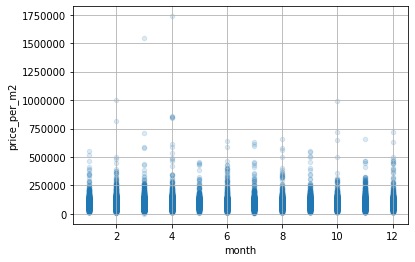

In [139]:
data.plot(x = 'month', y = 'price_per_m2', kind = 'scatter', grid = True,alpha=0.15);

In [140]:
data['price_per_m2'].corr(data['month'])

-0.004515574573789166

Корреляционная зависимость цены за метр и месяца размещения близка к нулю. Зависимости нет.

In [141]:
data['price_per_m2'].corr(data['year'])

0.011593897700517938

Аналогично, зависимость цены за метр и года отсутствует.

In [142]:
top_locations = data.pivot_table(index = 'nw_loc_nm', values='last_price', aggfunc = 'count').reset_index().sort_values(by = 'last_price', ascending = False).head(10)
avg_price_loc = data.pivot_table(index = 'nw_loc_nm', values='price_per_m2').reset_index()
new_col1 = ['nw_loc_nm', 'qty']
top_locations.set_axis(new_col1, axis = 'columns', inplace = True)
top_locations=top_locations.merge(avg_price_loc, on = 'nw_loc_nm', how = 'left')
top_locations

,nw_loc_nm,qty,price_per_m2
0,САНКТ-ПЕТЕРБУРГ,15455,114376.462915
1,МУРИНО,570,82493.708388
2,ШУШАРЫ,435,78469.717790
3,ВСЕВОЛОЖСК,392,68618.013712
4,ПУШКИН,367,102988.100753
5,КОЛПИНО,338,75424.579098
6,ПАРГОЛОВО,322,90448.423806
7,КУДРОВО,318,88152.954028
8,ГАТЧИНА,307,68746.146763
9,ВЫБОРГ,237,58141.909153


Создадим датафрейм с наибольшим количеством объявлений и датафрейм avg_price_loc со средними ценами за метр в разрезе населенных пунктов. Объединим эти датафреймы и сохраним в переменной top_locations.

In [143]:
top_locations.sort_values(by = 'price_per_m2', ascending = False)

,nw_loc_nm,qty,price_per_m2
0,САНКТ-ПЕТЕРБУРГ,15455,114376.462915
4,ПУШКИН,367,102988.100753
6,ПАРГОЛОВО,322,90448.423806
7,КУДРОВО,318,88152.954028
1,МУРИНО,570,82493.708388
2,ШУШАРЫ,435,78469.717790
5,КОЛПИНО,338,75424.579098
8,ГАТЧИНА,307,68746.146763
3,ВСЕВОЛОЖСК,392,68618.013712
9,ВЫБОРГ,237,58141.909153


Максимальная стоимость за квадратный метр - в Санкт-Петербурге. Минимальная - в Выборге.

In [144]:
spb = data.query('~cityCenters_nearest.isna() and nw_loc_nm == "САНКТ-ПЕТЕРБУРГ"')
spb['cityCenters_nearest'] = spb['cityCenters_nearest']/1000
spb['cityCenters_nearest']=spb['cityCenters_nearest'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [145]:
spb_per_km = spb.pivot_table(index = 'cityCenters_nearest', values = 'price_per_m2', aggfunc = 'mean').reset_index()
spb_per_km

,cityCenters_nearest,price_per_m2
0,0,188733.428534
1,1,167464.634211
2,2,146862.022424
3,3,125191.653814
4,4,136847.550499
5,5,146235.912881
6,6,150479.850945
7,7,141536.661271
8,8,120296.435076
9,9,109990.068016


Создадим сводную таблицу зависимости цен за метр и расстояний до центра в Санкт-Петербурге. Сделаем срез датафрейма по двум критериям: непустое расстояние до центра и населенный пункт = Санкт-Петербург. Разделим столбец cityCenters_nearest на 1000, чтобы перевести метры в километры и приведем к типу int методом astype. Сформируем сводную spb_per_km со средними ценами квадратного метра в зависимости от дальности нахождения объекта от центра.

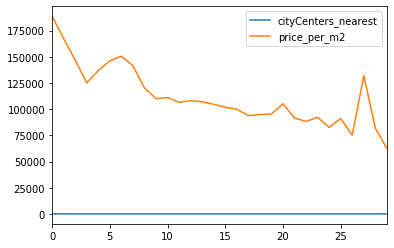

In [146]:
spb_per_km.plot.line();

Из графика и сводной таблицы видно, что резкое падение цены за квадратный метр начинается с отметки 9 км. от центра. Исходя из результатов анализа центральная зона располагается в радиусе 8 километров включительно.

In [147]:
spb_center_object = spb.query('cityCenters_nearest<=8')

Создадим датафрейм с объектами в центре (не далее 8 км.)

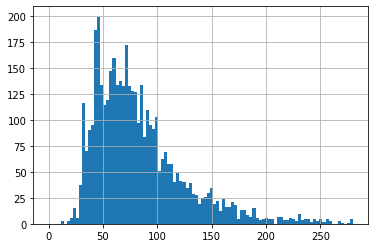

In [148]:
spb_center_object['total_area'].hist(bins = 100, range = (0,280));

In [149]:
md_area_centre = statistics.mode(spb_center_object['total_area'])
md_area_centre

60.0

In [150]:
spb_center_object['total_area'].describe()

count    4285.000000
mean       87.205685
std        54.596747
min        12.000000
25%        53.000000
50%        74.700000
75%       103.100000
max       900.000000
Name: total_area, dtype: float64

В целом распределение похоже на нормальное, но в отличии от более удаленной от объектов нецентральной зоны большинство квартир - 60-метровые. Медианная площадь - 74,7 м2, среднее значение - 87м2. Отличие среднего от медианы и стандартного отклонения в 54 м2 говорит о наличии множества нетиповых объектов большой площади. Объект с минимальной площадью - 12м2.

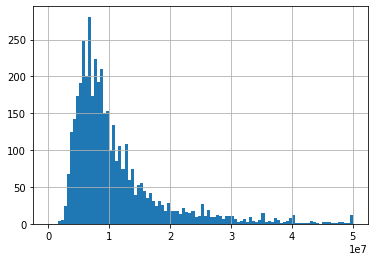

In [151]:
spb_center_object['last_price'].hist(bins = 100, range = (0,50000000));

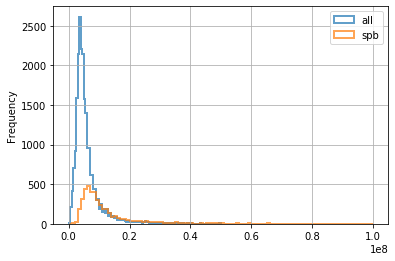

In [152]:
ax = data.plot(
    kind = 'hist', 
    y='last_price', 
    histtype='step', 
    range = (0,50000000),
    bins = 100,
    linewidth=2,
    alpha=0.7,
    label='all',
)
spb_center_object.plot(
        kind = 'hist', 
    y='last_price', 
    histtype='step', 
    range = (0,100000000),
    bins = 100,
    linewidth=2,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
);

Форма диаграмм распределения в центре и в общей базе объявлений схожа.

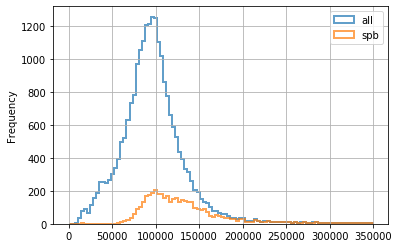

In [153]:
ax = data.plot(
    kind = 'hist', 
    y='price_per_m2', 
    histtype='step', 
    range = (0,350000),
    bins = 100,
    linewidth=2,
    alpha=0.7,
    label='all',
)
spb_center_object.plot(
        kind = 'hist', 
    y='price_per_m2', 
    histtype='step', 
    range = (0,350000),
    bins = 100,
    linewidth=2,
    alpha=0.7,
    label='spb',
    ax=ax,
    grid=True,
    legend=True,
);

Цены за м2 в центре начинаются от 50 тыс. за квадратный метр и таких объектов очень мало. В общей базе объявлений есть объекты и по 20 тыс за м2 (скорее всего это удаленные от города поселки).

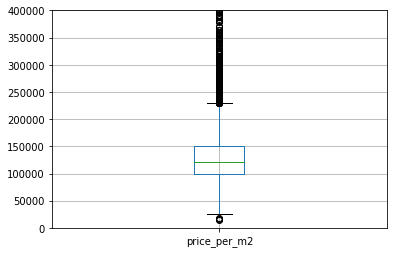

In [154]:
plt.ylim(0, 400000)
spb_center_object.boxplot(column = 'price_per_m2');

Нормальными значениями цены за метр для объектов в центре являются объекты от 25 до 225 тыс/м2. 2 квартиль - от 100 до 150 тыс./м2

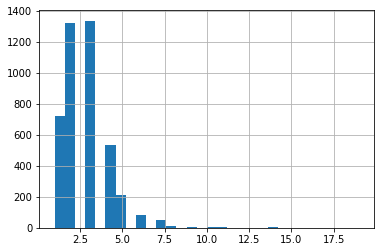

In [155]:
spb_center_object['rooms'].hist(bins = 30);

В центре города по количеству лидируют трехкомнатные объекты. С очень небольшим отрывом следуют двухкомнатные. Однокомнатных - вполовину меньше. На 4 месте - четырехкомнатные квартиры. 

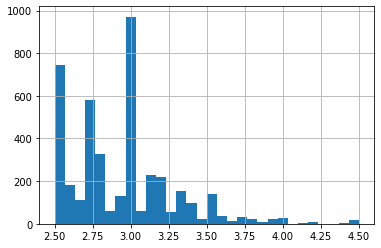

In [156]:
spb_center_object['ceiling_height_fin'].hist(bins = 30);

В центре города безусловным лидером являются объекты с трехметровыми потолками. Второе место занимают объекты с типовыми 2,5-метровыми потолками. Третье место - объекты улучшенной планировки с потолками, высотой 2,75 м.

In [157]:
spb_center_object_corr = spb_center_object[['rooms', 'floor','cityCenters_nearest', 'weekday','month', 'year', 'price_per_m2']]
spb_center_object_corr.corr()

,rooms,floor,cityCenters_nearest,weekday,month,year,price_per_m2
rooms,1.000000,-0.057564,-0.227486,-0.008479,-0.006529,-0.071396,0.004194
floor,-0.057564,1.000000,0.257262,0.028952,0.017042,-0.023954,0.106345
cityCenters_nearest,-0.227486,0.257262,1.000000,0.016859,0.003019,0.056098,-0.091064
weekday,-0.008479,0.028952,0.016859,1.000000,0.033444,-0.008055,-0.002102
month,-0.006529,0.017042,0.003019,0.033444,1.000000,-0.246556,-0.022322
year,-0.071396,-0.023954,0.056098,-0.008055,-0.246556,1.000000,0.010410
price_per_m2,0.004194,0.106345,-0.091064,-0.002102,-0.022322,0.010410,1.000000


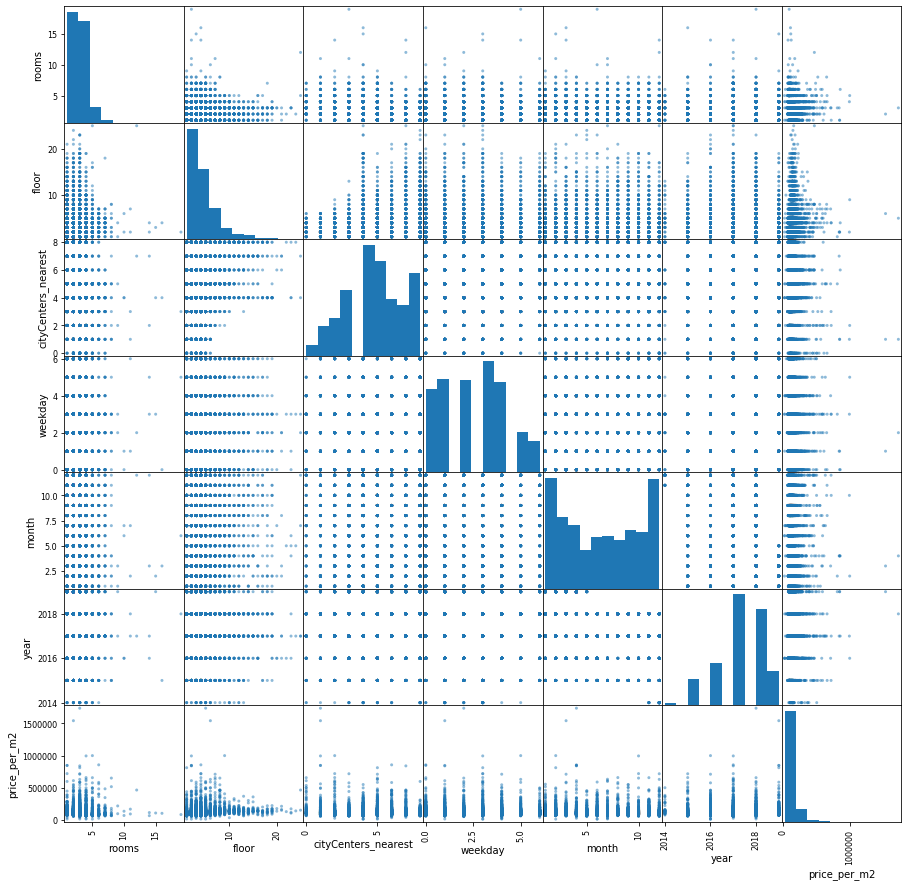

In [158]:
pd.plotting.scatter_matrix(spb_center_object_corr, figsize=(15, 15));

Как видно из матрицы корреляции, цена за метр объектов в центре слабо коррелирует с большинством основных параметров объекта. Есть слабая обратная корреляция с удаленностью от цента (чем дальше, тем ниже цена) и с этажностью. Количество комнат объекта почти не влияет на цену за метр. Дата размещения тоже не влияет на стоимость метра.

In [159]:
spb_center_object.pivot_table(index = 'floor_group', values = 'price_per_m2', aggfunc = 'median').sort_values(by = 'price_per_m2')

,price_per_m2
floor_group,
ПЕРВЫЙ,105833.333333
ПОСЛЕДНИЙ,115384.615385
ДРУГОЙ,125432.789581


Аналогично объектам не входящим в центр города, минимальная цена у объектов на первом этаже. Затем идет последний этаж и промежуточные этажи. Любопытно, что разрыв между категориями почти идентичен, 10 тыс руб/м2. Что отличается от объектов, не входящих в центральные районы.

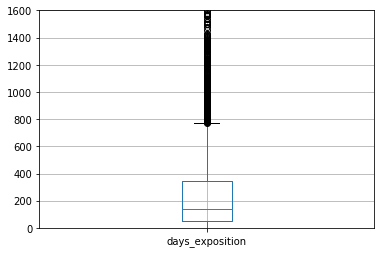

In [160]:
plt.ylim(0, 1600)
spb_center_object.boxplot(column = 'days_exposition');

In [161]:
spb_center_object['days_exposition'].describe()

count    4285.000000
mean      248.789498
std       287.890275
min         0.000000
25%        54.000000
50%       138.000000
75%       342.000000
max      1607.000000
Name: days_exposition, dtype: float64

Обычный срок продажи квартиры в центре - от 50 до 138 дней, что в среднем немного выше усредненного стандартного времени продажи для всех объектов выборки. Среднее значение почти в 2 раза больше медианы - 248 дней, что говорит о наличии объектов, продающихся в течении длительного периода времени.

## Общий вывод

Анализ данных по всем объектам города показал, что:
- большинство объектов в продаже - однокомнатные. Почти на этом же уровне, но немного меньше двухкомнатных объектов. Со значительным отставанием на третьей позиции - трехкомнатные объекты. Далее - многокомнатные квартиры. Картина для центра города отлична от общей по базе, в центре города по количеству лидируют трехкомнатные объекты. С очень небольшим отрывом следуют двухкомнатные. Однокомнатных - вполовину меньше. На 4 месте - четырехкомнатные квартиры. 
- диапазон цен за квадратный метр - от 25 до 170 тыс. 2 квартиль - от 75 до 130 тыс/м2. Аналогично, ситуация в центре города иная: более-менее массово цены начинаются от 50 тыс. за квадратный метр и таких объектов очень мало 2 квартиль - от 100 до 150 тыс./м2., объекты в центре значительно дороже.
- общая масса квартир имеет стандартрую высоту потолков 2,5м. На втором месте -улучшенные объекты с потолками 2,75м. Трехметровые потолки занимают третью позицию. А в центре города  безусловным лидером являются объекты с трехметровыми потолками. Второе место занимают объекты с типовыми 2,5-метровыми потолками. Третье место - объекты улучшенной планировки с потолками, высотой 2,75 м.
- Средняя продолжительность продажи - от 43 до 95 дней. Верхний "ус" boxplot заканчивается примерно на 550 днях, значит выше уже идут аномальные значения. Обычно продажа занимает от 45 до 238 дней. Очень быстрой продажей можно считать продажу до 43 дней. Для объектов в центре города обычный срок продажи квартиры составляет от 50 до 138 дней, что в среднем немного выше усредненного стандартного времени продажи для всех объектов выборки. Среднее значение почти в 2 раза больше медианы - 248 дней, что говорит о наличии объектов, продающихся в течении длительного периода времени.
Максимальные корреляционные зависимости цены за метр в целом по датафрейму - у показателя "площадь объекта" (0,26) и "расстояние от центра" (цена падает с удалением от центра) - 0,38. Количество комнат практически не влияет на стоимость за квадратный метр. Цена также не зависит от месяца и года публикации объявления. Но у объявлений, размещенных в начале рабочей недели (понедельник-вторник-среда) цена за квадратный метр выше, что может объясняться тем, что это объявления риелторских агентств, которые не работают в выходные и закладывают в цену свой % за услуги. Проверить гипотезу можно было бы если бы в датасете было поле "Тип продавца".

Объекты на первых этажах продаются по минимальной цене за квадратный метр. Дороже - объекты на последних этажах. Выше всего стоимость квадратного метра у объектов, расположенных не на первом и не на последнем этаже

Для объектов в центре корреляция с основными параметрами еще ниже. Есть слабая обратная корреляция с удаленностью от цента (чем дальше, тем ниже цена) и с этажностью. Количество комнат объекта почти не влияет на цену за метр. Дата размещения тоже не влияет на стоимость метра.
Аналогично объектам не входящим в центр города, минимальная цена у объектов на первом этаже. Затем идет последний этаж и промежуточные этажи. Любопытно, что разрыв между категориями почти идентичен, 10 тыс руб/м2, что не является правилом для объектов выборки в целом.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [x]  есть общий вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>